<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

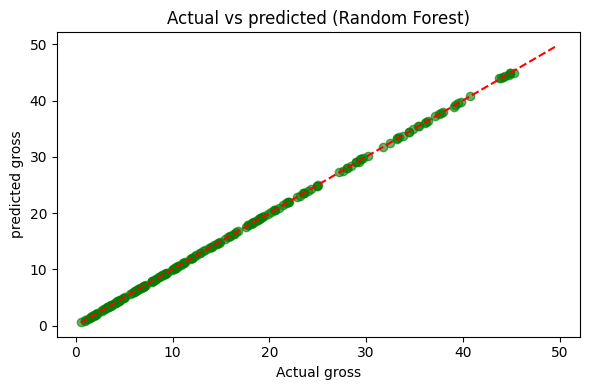

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('SuperMarket Analysis.csv')
data.dropna() #drop missing Values
df = data.copy()
df.info()

data.groupby('Product line')['gross income'].sum()
data.groupby('Payment')['gross income'].sum()

drop_columns = ['Invoice ID', 'Branch','City', 'Date', 'Time','Customer type']
df1 = df.drop(columns = drop_columns, errors = 'ignore')

df2 = pd.get_dummies(df1, columns =['Gender','Product line', 'Payment'], drop_first=True) # convert categorical columns to numbers (encoding)

X = df2.drop(columns = (['gross income' ])) # Getting X values except gross income      
y = df2['gross income'] # getting y values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =42) #split into 80% for training and 20% for testing

# use random forest model to predict gross income
model = RandomForestRegressor(n_estimators=100 , random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # Predict totals using test data

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error : {mae:.2f}")

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y.min(), y.max()],[y.min(), y.max()], 'r--')
plt.xlabel('Actual gross')
plt.ylabel('predicted gross')
plt.title('Actual vs predicted (Random Forest)')
plt.tight_layout()
plt.show()